In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [135]:
games_df = pd.read_csv('games.zip',sep=';',compression = 'zip')
games_df.head()

,Unnamed: 0,Unnamed: 0.1,White_Elo,Black_Elo,Result,Opening,Variation,Time_Control,Increment,Evaluation,Players_Clock,Termination,Moves
0,0,0,1791,1829,1-0,Queen's Gambit Refused,Marshall Defense,180.0,2.0,"['0.25', '0.25', '0.26', '0.78', '-0.08', '0.4...","['0:03:00', '0:03:00', '0:03:01', '0:03:02', '...",Resignation,1.d4 d5 2.c4 Nf6 3.Nc3 c6 4.Bg5 e6 5.f3 Be7 6....
1,1,1,2120,2104,1-0,Sicilian Defense,"Smith-Morra Gambit Accepted, Paulsen Formation",300.0,0.0,"['0.24', '0.2', '0.21', '0.47', '0.22', '0.09'...","['0:05:00', '0:05:00', '0:04:59', '0:04:59', '...",Checkmate,1.e4 c5 2.Nf3 e6 3.d4 cxd4 4.c3 dxc3 5.Nxc3 Nc...
2,2,2,1457,1521,1-0,Sicilian Defense,Old Sicilian,600.0,0.0,"['0.24', '0.2', '0.21', '0.08', '0.0', '0.0', ...","['0:10:00', '0:10:00', '0:09:59', '0:09:59', '...",Checkmate,1.e4 c5 2.Nf3 Nc6 3.Bc4 e6 4.d4 a6 5.dxc5 d5 6...
3,3,3,2296,2303,1-0,Queen's Pawn Game,London System,600.0,0.0,"['0.25', '0.22', '0.0', '0.0', '0.0', '0.0', '...","['0:10:00', '0:10:00', '0:09:58', '0:09:57', '...",Resignation,1.d4 Nf6 2.Bf4 d5 3.Nf3 c5 4.e3 Nc6 5.Nbd2 e6 ...
4,4,4,1547,1560,0-1,Queen's Pawn Game,Mason Attack,600.0,0.0,"['0.25', '0.25', '0.0', '0.37', '0.41', '0.54'...","['0:10:00', '0:10:00', '0:09:58', '0:09:56', '...",Resignation,1.d4 d5 2.Bf4 Nc6 3.e3 Nf6 4.Nf3 a6 5.c3 Bf5 6...


In [136]:
#Removing the two first columns originated from poor saving to csv
games_df.drop(games_df.columns[[0,1]],axis = 1,inplace=True)
games_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44199 entries, 0 to 44198
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   White_Elo      44199 non-null  int64  
 1   Black_Elo      44199 non-null  int64  
 2   Result         44199 non-null  object 
 3   Opening        44199 non-null  object 
 4   Variation      29336 non-null  object 
 5   Time_Control   44059 non-null  float64
 6   Increment      44059 non-null  float64
 7   Evaluation     44199 non-null  object 
 8   Players_Clock  44199 non-null  object 
 9   Termination    44199 non-null  object 
 10  Moves          44199 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


About 15k of Variation is missing and we have some time control with increment also missing

<AxesSubplot:>

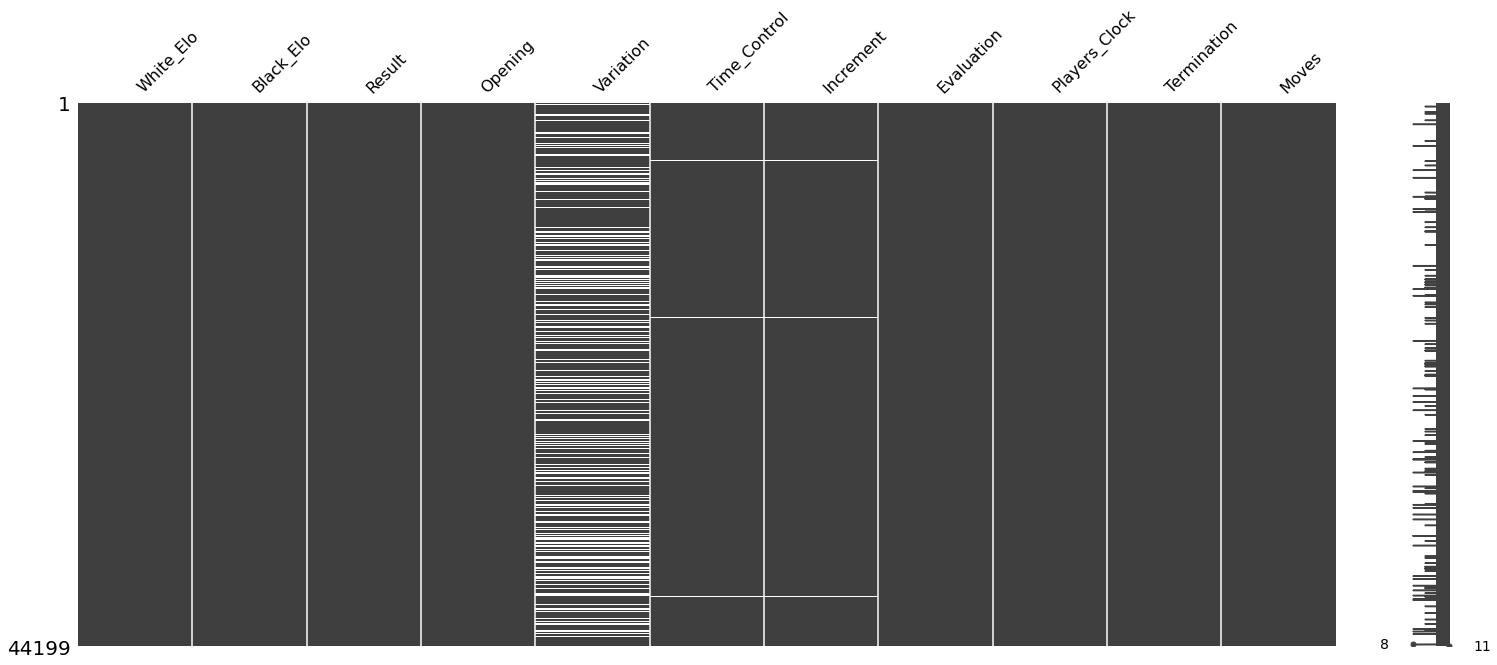

In [137]:
import missingno as msno
msno.matrix(games_df)

<AxesSubplot:>

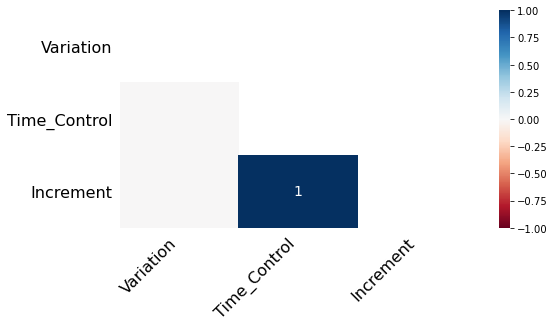

In [138]:

msno.heatmap(games_df,figsize=(8,4))

Time_control and Variation have a perfect correlation, I'll be removing all of them as is just a small part of the data. The varaiation missing is becuase they played the classical/mainlaine variation or a unknow variation,for these we are going to simply put a empty space string

In [143]:
games_df['Variation'].fillna('',inplace = True)
games_df.dropna(inplace=True)
games_df.reset_index(drop=True,inplace=True)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44059 entries, 0 to 44058
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   White_Elo      44059 non-null  int64  
 1   Black_Elo      44059 non-null  int64  
 2   Result         44059 non-null  object 
 3   Opening        44059 non-null  object 
 4   Variation      44059 non-null  object 
 5   Time_Control   44059 non-null  float64
 6   Increment      44059 non-null  float64
 7   Evaluation     44059 non-null  object 
 8   Players_Clock  44059 non-null  object 
 9   Termination    44059 non-null  object 
 10  Moves          44059 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [144]:
games_df.describe()

,White_Elo,Black_Elo,Time_Control,Increment
count,44059.000000,44059.000000,44059.000000,44059.000000
mean,1591.501850,1591.950861,382.883179,2.585306
std,337.093955,336.413808,346.497234,5.205767
min,600.000000,600.000000,0.000000,0.000000
25%,1344.000000,1343.000000,180.000000,0.000000
50%,1581.000000,1583.000000,300.000000,0.000000
75%,1825.000000,1826.000000,600.000000,2.000000
max,2882.000000,2882.000000,10800.000000,180.000000


Time control has a min value of 0, which doesn't make sense for a match to have 0 minutes, all other variables seems fine

In [145]:
games_df[games_df['Time_Control']==0].head()

,White_Elo,Black_Elo,Result,Opening,Variation,Time_Control,Increment,Evaluation,Players_Clock,Termination,Moves
1457,2425,2312,1-0,Queen's Pawn Game,Zukertort Variation,0.0,1.0,"['0.06', '0.25', '0.0', '0.35', '0.09', '0.23'...","['0:00:03', '0:00:03', '0:00:03', '0:00:03', '...",Time forfeit,1.Nf3 d5 2.d4 c6 3.Bg5 h6 4.Bh4 g5 5.Bg3 Bg7 6...
1705,1390,1363,0-1,Ponziani Opening,Jaenisch Counterattack,0.0,10.0,"['0.24', '0.37', '0.26', '0.15', '-0.09', '0.0...","['0:00:10', '0:00:10', '0:00:19', '0:00:20', '...",Checkmate,1.e4 e5 2.Nf3 Nc6 3.c3 Nf6 4.Bd3 Bc5 5.O-O d6 ...
2715,1803,1388,1-0,Scandinavian Defense,Mieses-Kotroc Variation,0.0,3.0,"['0.24', '0.53', '0.45', '0.71', '0.44', '0.72...","['0:00:03', '0:00:03', '0:00:05', '0:00:05', '...",Checkmate,1.e4 d5 2.exd5 Qxd5 3.Nf3 Qe6+ 4.Be2 Qe5 5.d4 ...
2836,1835,1333,1-0,Caro-Kann Defense,"Accelerated Panov Attack, Modern Variation",0.0,2.0,"['0.24', '0.23', '0.15', '-0.07', '0.0', '0.28...","['0:00:03', '0:00:03', '0:00:04', '0:00:04', '...",Checkmate,1.e4 c6 2.c4 d5 3.cxd5 cxd5 4.exd5 Nf6 5.Nc3 N...
2920,1805,1386,1-0,French Defense,,0.0,3.0,"['0.24', '0.3', '-0.24', '0.23', '-1.02', '-0....","['0:00:03', '0:00:03', '0:00:05', '0:00:06', '...",Resignation,1.e4 e6 2.Bc4 Be7 3.f4 c6 4.Nf3 a6 5.O-O b5 6....


Let's take a look at players clock in some of theses games

In [146]:
games_df.Players_Clock[games_df['Time_Control']==0].head()

1457    ['0:00:03', '0:00:03', '0:00:03', '0:00:03', '...
1705    ['0:00:10', '0:00:10', '0:00:19', '0:00:20', '...
2715    ['0:00:03', '0:00:03', '0:00:05', '0:00:05', '...
2836    ['0:00:03', '0:00:03', '0:00:04', '0:00:04', '...
2920    ['0:00:03', '0:00:03', '0:00:05', '0:00:06', '...
Name: Players_Clock, dtype: object

These matches appear to start with seconds for each player, I  created a custom mathc at lichess with starting time of 0 and 8 second of incremen and looked at the pgn of the match, the time control was O, so that's explain why Later it might be interesting to compare the data of this games with the data

In [147]:
games_df['Opening'].value_counts()

Sicilian Defense                                            5747
Queen's Pawn Game                                           3113
French Defense                                              2777
Scandinavian Defense                                        1969
Italian Game                                                1806
                                                            ... 
Valencia Opening                                               1
King's Gambit Accepted, Gianutio Countergambit                 1
King's Gambit, Falkbeer Countergambit, Pickler Gambit          1
King's Gambit Accepted, Bishop's Gambit, Gianutio Gambit       1
Evans Gambit, McDonnell Defense, Main Line                     1
Name: Opening, Length: 236, dtype: int64

Sicilian Defense is the most played opening in the dataset, followed by the Queen' Pawn Game. We can also see that some opening still have their variaton(i.e: Evans Gambit, McDonnell Defense, Main Line), meaning that we were unnable to catch those in previous cleaning

In [148]:
openings = games_df['Opening'].to_numpy()
for i,opn in enumerate(openings):
    match= re.search(r'.+,(.+)',opn)
    if match:
        opening=match.group(0)
        variation = match.group(1)
        games_df.at[i,'Opening'] = opening
        games_df.at[i,'Variation'] = variation
games_df['Opening'].value_counts()  

Sicilian Defense                                            5747
Queen's Pawn Game                                           3113
French Defense                                              2777
Scandinavian Defense                                        1969
Italian Game                                                1806
                                                            ... 
Valencia Opening                                               1
King's Gambit Accepted, Gianutio Countergambit                 1
King's Gambit, Falkbeer Countergambit, Pickler Gambit          1
King's Gambit Accepted, Bishop's Gambit, Gianutio Gambit       1
Evans Gambit, McDonnell Defense, Main Line                     1
Name: Opening, Length: 236, dtype: int64

Let's see if that makes a difference in the variation that were missing. Remember that we had 15173 missing variations

In [149]:
len(games_df.Variation[games_df['Variation']==''])

13969

In [150]:
games_df['Result'].value_counts()

1-0    22102
0-1    20718
2-1     1204
0-0        6
1-1        5
2-2        3
9-2        3
0-2        2
1-2        2
6-9        2
7-1        2
6-0        1
5-2        1
9-9        1
3-2        1
0-4        1
1-4        1
5-9        1
7-0        1
8-9        1
8-4        1
Name: Result, dtype: int64

Three unexpected things in the result data, first the lack of scores with 0.5 or 1/2(the ammount awarded for a draw),the scores that imply more than one game, and the 0-0 scores. The secong is probably because the pgn gets the result of the match rather than that of the single game(a match being multiple games played in a row by the same players), the 0-0 score I have no idea.

The first one, the lack of draw scores worries me, I expected to have fewer number of draws, those familiar with chess know that draws are more common among higher rated players which are smaller number of the population(we will se if thats true for these games) and rare in lower ratings. But to have zero is anomaly. 

I believe three things might explain these, the first one is my method for choosing games in the database, I chose games that were one of the players requested a computer analysis after the match to study it, and you usually analise games that you've lost, so these would make draws ene less common, another one is that draws migh be hidden in the multiple games match, if in the match players tied twice you would have a whole number, but it's unlikely that all draws are only in matches and not in single games,a third factor could be the way lichess store it games, if the billions of games in the database are store in a way where decisive result(wins) come before draws, due to teh fact that i only parsed through a small fraction of games, I would not have gathered draws. 

Thats unfotunate as I belived draws would be a important predictor, due to the discrepancy between its occurance among lower and higher rated players

In [151]:
#I was going to simply remove the matches from the dataset, but i want to see if they differantiate from the dataset
matches_df = games_df[(games_df['Result'] != '1-0') & (games_df['Result']!='0-1')]
matches_df.describe()

,White_Elo,Black_Elo,Time_Control,Increment
count,1239.000000,1239.000000,1239.000000,1239.000000
mean,1725.698951,1726.054883,438.861985,3.225182
std,353.332623,349.762562,476.970994,7.291650
min,728.000000,781.000000,0.000000,0.000000
25%,1478.500000,1469.000000,180.000000,0.000000
50%,1731.000000,1729.000000,300.000000,0.000000
75%,1954.000000,1954.500000,600.000000,3.000000
max,2817.000000,2882.000000,10800.000000,180.000000


The average elo rating are different from each other in about 200 points, but both are inside the standard variation of each popoluation, which is a strong indication that difference is not statisticallt relevant

In [157]:
from scipy.stats import ttest_ind
idx=matches_df.index
df_Wavg=games_df['White_Elo'].drop(index=idx).to_numpy()
matches_Wavg=matches_df['White_Elo'].to_numpy()
ttest_ind(df_Wavg,matches_Wavg)

Ttest_indResult(statistic=-14.246722762812276, pvalue=5.944811816893922e-46)

Our ttest show us that averages are in fact different from each other, so for that reason I'll not remove them from the dataset, but will try to verify the result of the particular game.